In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [53]:
# Function to make bar graph from the data

def make_bar(data):
    models = list(data.keys())  # List of every model tested
    models.sort()

    # Assume each model was tested with all the same tests
    tests = list(data[models[0]].keys())  # These will be the labels
    tests.sort()

    x = np.arange(len(tests))  # positions of labels
    width = 0.2  # width of bars

    # Make bar plots
    fig, ax = plt.subplots()
    n = len(models)
    for i in range(n):
        model = models[i]
        # Get the accuracy for each test
        accuracy = []
        for test in tests:
            accuracy.append(data[model][test])


        avg_accuracy = np.mean(accuracy)
        label = '{:s} - average accuracy: {:.2f}'.format( model, avg_accuracy)
        rects = ax.bar(x + i*width, accuracy, width, label=label)


    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Test')
    ax.set_xticks(x + (n-1)*width/2)
    ax.set_xticklabels(tests, rotation='vertical')
    ax.legend()
    ax.grid(True)


    

In [54]:
# Function that loads data from the output json file and then calls make_bar

def create_graphic(filename):
    # Open the results json file
    f = open(filename)
    f = json.load(f)

    # Store the information from the file in a dictionary
    data = {}
    for i in range(len(f)):
        accuracy = f[i]['Total Correct'] / f[i]['Total Attempted']
        model = f[i]['Model']
        test = f[i]['Test']

        if model not in data.keys():  # Create a new key if its not in the dictionary
            data[model] = {}
        
        data[model].update({test: accuracy})
    
    make_bar(data)
    return data


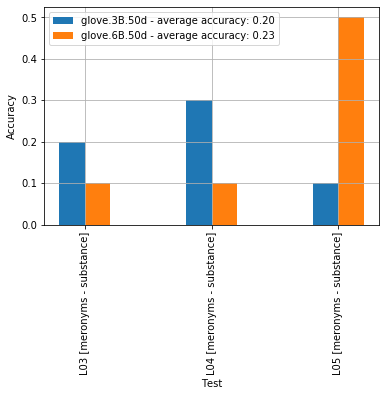

In [61]:
data = create_graphic('bigger_example_experiment_output.txt')
plt.show()